In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # For change in the labels of the output

In [16]:
df = pd.read_excel("Attribute DataSet.xlsx")

In [17]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [34]:
df.isnull().sum()
# df.notnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [22]:
df2 = df.apply(LabelEncoder().fit_transform)

In [33]:
df2.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,327,5,2,12,1,3,7,10,1,23,3,20,0,1
1,462,1,2,0,0,3,7,0,2,8,22,20,0,0
2,449,11,1,0,0,0,7,4,2,15,22,24,10,0
3,299,0,0,12,0,2,7,4,2,18,3,8,10,1
4,199,7,2,11,1,3,7,1,2,2,3,3,2,0


In [36]:
# df2["Price"] = df2["Price"].fillna(df2["Price"].mean())
df2.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
waiseline         0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
dtype: int64

In [53]:
km = KMeans(n_clusters=2, max_iter=400,verbose=True,tol=0.2)
pred = km.fit_predict(df2[["Style", "Price", "Rating", "Size", "Season", "NeckLine", "SleeveLength", "waiseline", "Material", "FabricType", "Decoration", "Pattern Type"]])
score = accuracy_score(df2["Recommendation"], pred)
score

Initialization complete
Iteration 0, inertia 183721.0
Iteration 1, inertia 117128.62149649004
Iteration 2, inertia 112828.63697737537
Converged at iteration 2: center shift 0.010815603616621372 within tolerance 5.08576033333335.
Initialization complete
Iteration 0, inertia 181372.0
Iteration 1, inertia 113012.41782874889
Converged at iteration 1: center shift 0.7000788381412286 within tolerance 5.08576033333335.
Initialization complete
Iteration 0, inertia 257181.0
Iteration 1, inertia 127765.3039743946
Iteration 2, inertia 125111.45312847444
Converged at iteration 2: center shift 1.703749847212298 within tolerance 5.08576033333335.
Initialization complete
Iteration 0, inertia 182547.0
Iteration 1, inertia 125598.7116905702
Converged at iteration 1: center shift 4.2016215801508086 within tolerance 5.08576033333335.
Initialization complete
Iteration 0, inertia 205311.0
Iteration 1, inertia 115154.4381969978
Iteration 2, inertia 112859.78698579397
Converged at iteration 2: center shift 0

0.476

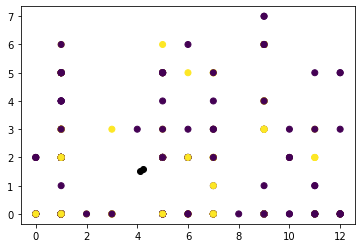

In [43]:
plt.scatter(df2["Style"], df2["Price"],c=pred)
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')